<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

FRED is, at heart, an embedder of directed graphs. But what types of graphs? This notebook, and those nested under 01a01, contain a battery of toy directed graphs, including:

1. (Directed) Stochastic Block Models
2. Trees
3. Small Random graphs

This notebook houses a sampling of these graphs, with details on how to call them and visualize them.

## Graph Visualization Tools

In [1]:
#|output: asis
#| echo: false
show_doc(visualize_graph)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/plotting.py#L109){target="_blank" style="float:right; font-size:smaller"}

### visualize_graph

>      visualize_graph (data, is_networkx=False, to_undirected=False, ax=None)

In [2]:
#|output: asis
#| echo: false
show_doc(visualize_heatmap)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L26){target="_blank" style="float:right; font-size:smaller"}

### visualize_heatmap

>      visualize_heatmap (edge_index, order_ind=None, cmap='copper', ax=None)

In [3]:
#|output: asis
#| echo: false
show_doc(display_gallery)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L37){target="_blank" style="float:right; font-size:smaller"}

### display_gallery

>      display_gallery (vizset, ncol=4)

In [4]:
#|output: asis
#| echo: false
show_doc(display_graph_gallery)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L48){target="_blank" style="float:right; font-size:smaller"}

### display_graph_gallery

>      display_graph_gallery (dataset, ncol=4)

In [5]:
#|output: asis
#| echo: false
show_doc(display_heatmap_gallery)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L55){target="_blank" style="float:right; font-size:smaller"}

### display_heatmap_gallery

>      display_heatmap_gallery (dataset, ncol=4)

# Small Random Toy Directed Graphs

First, we will create several small and random toy directed graphs and visualize them directly. We will test any embedding and visualization methods on these datasets to check if the embeddings/visualization matches our intuition about the flow on the small directed graphs.

In [6]:
#|output: asis
#| echo: false
show_doc(SmallRandom)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L72){target="_blank" style="float:right; font-size:smaller"}

### SmallRandom

>      SmallRandom (num_nodes=5, prob_edge=0.2, transform=None,
>                   pre_transform=None)

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

Let's try creating one such graph

In [ ]:
dataset = SmallRandom(num_nodes=10, prob_edge=0.3)
data = dataset[0] # there is only graph in this dataset

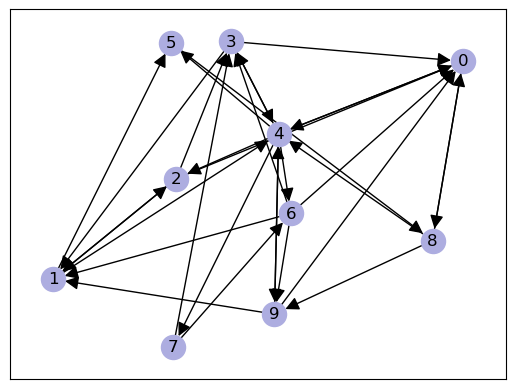

In [ ]:
visualize_graph(data)

## Add source and sink communities

In a directed graph, a node is a source if it has in-degree of 0, and a node is a sink if it has out-degree of 0. These notions can be generalized into source communities and sink communities (by communities we simply mean a group of nodes in the directed graph). If we think of information on the directed graph as some mass diffusing through random walk, then mass will stay in the sink communities once enter and mass will stay out of the source communities once exit. Then, the existence of source and/or sink communities could imbalancedly affect the measurement of diffusion curvature.

In order to assess and possibly correct this effect, we first want to create directed graphs with source and/or sink communities. We will do so by create pretransformation to existing directed graph data so to make all edges connected to some ground-truth communities pointing outwards (for source communities) or inwards (for sink communities). 

We will be flexible and add a parameter `adv_prob` to indicate the probability of edges pointing in the _wrong_ direction. This probability should be zero or close to zero.

There are two possible way to _correct_ the edges that point in the wrong direction: either by reversing the direction or by removing the edge completely. The probability of employing these methods is specified by the probability `remove_prob`. This parameter could help mitigate the effect of excessive number of edges pointing out of (into resp.) source (sink resp.) communities.

In [7]:
#|output: asis
#| echo: false
show_doc(SourceSink)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L100){target="_blank" style="float:right; font-size:smaller"}

### SourceSink

>      SourceSink (prob_source=0.1, prob_sink=0.1, adv_prob=0, remove_prob=0)

Transform a (directed or undirected) graph into a directed graph
with a proportion of the nodes with mostly out-edges
and a porportion of the nodes with mostly in-edges

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| prob_source | float | 0.1 | must be between 0 and 1<br>Proportion of nodes/communities to turn into source nodes/communities<br>(with mostly out-edges) |
| prob_sink | float | 0.1 | must be between 0 and 1<br>prob_source and prob_sink must add up to no more than 1<br>Proportion of nodes/communities to turn into sink nodes/communities<br>(with mostly in-edges) |
| adv_prob | int | 0 | must be between 0 and 1<br>Probability of in-edges for source nodes and/or out-edges for sink nodes |
| remove_prob | int | 0 | must be between 0 and 1<br>Probability of removing an in-edge for source nodes and/or out-edges for sink nodes<br>1 - remove_prob is the probability of reversing the direction of in-edge for source nodes and/or out-edges for sink nodes |

It is also possible to create source and sink nodes using the same [`SourceSink`](https://x.riddle.press/FEARFRED/toy_graph_datasets.html#sourcesink) transformation to generate small directed graph with specific characteristic. We will try transforming the graph above into a big cluster of source and a smaller cluster of sinks

In [ ]:
pre_transform = SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
dataset = SmallRandom(num_nodes=20, prob_edge=0.2, pre_transform=pre_transform)
data = dataset[0]

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_88073/2928479379.py:88: UserWarning: Data has no ground-truth labels
  warnings.warn("Data has no ground-truth labels")


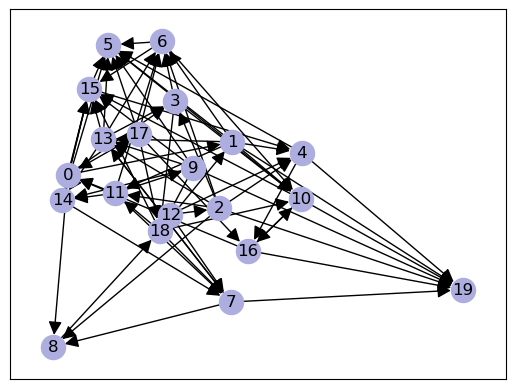

In [ ]:
visualize_graph(data)

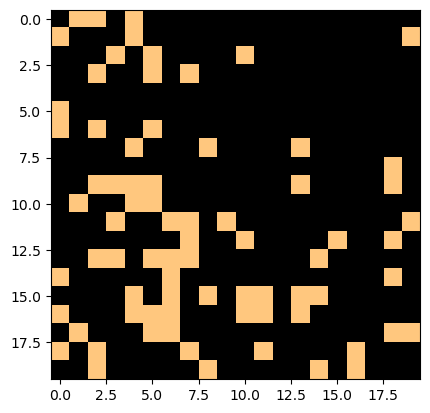

In [ ]:
order_ind = torch.argsort(data.y[:,1])
visualize_heatmap(data.edge_index, order_ind)

# Specific Small Graphs

We create a few extremely simple graphs that can be immediately understood with simple nodes-and-edges visualization, including [`ChainGraph`](https://x.riddle.press/FEARFRED/toy_graph_datasets.html#chaingraph) and [`CycleGraph`](https://x.riddle.press/FEARFRED/toy_graph_datasets.html#cyclegraph).

In [8]:
#|output: asis
#| echo: false
show_doc(ChainGraph)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L218){target="_blank" style="float:right; font-size:smaller"}

### ChainGraph

>      ChainGraph (num_nodes=5, transform=None)

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

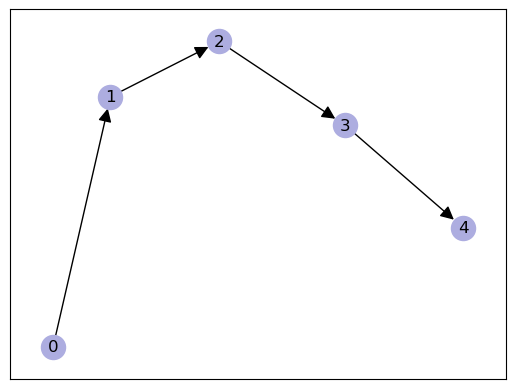

In [ ]:
dataset = ChainGraph(num_nodes=5)
data = dataset[0]
visualize_graph(data)

In [9]:
#|output: asis
#| echo: false
show_doc(HalfChainGraph)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L231){target="_blank" style="float:right; font-size:smaller"}

### HalfChainGraph

>      HalfChainGraph (num_nodes=3, center=1, transform=None)

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

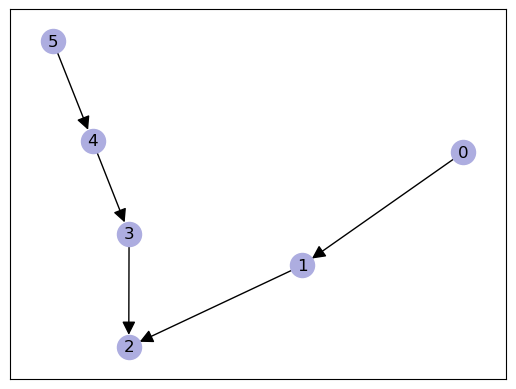

In [ ]:
dataset = HalfChainGraph(num_nodes=6, center=2)
data = dataset[0]
visualize_graph(data)

In [10]:
#|output: asis
#| echo: false
show_doc(CycleGraph)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L247){target="_blank" style="float:right; font-size:smaller"}

### CycleGraph

>      CycleGraph (num_nodes=8, transform=None)

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

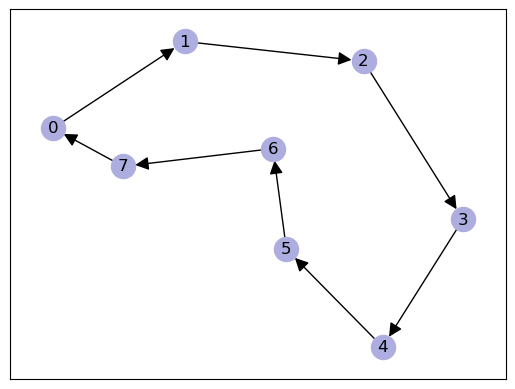

In [ ]:
dataset = CycleGraph(num_nodes=8)
data = dataset[0]
visualize_graph(data)

In [11]:
#|output: asis
#| echo: false
show_doc(HalfCycleGraph)

---

[source](https://github.com/professorwug/FEARFRED/blob/main/FEARFRED/datasets/toy_graphs.py#L261){target="_blank" style="float:right; font-size:smaller"}

### HalfCycleGraph

>      HalfCycleGraph (num_nodes=3, center=0, transform=None)

Dataset base class for creating graph datasets which easily fit
into CPU memory.
Inherits from :class:`torch_geometric.data.Dataset`.
See `here <https://pytorch-geometric.readthedocs.io/en/latest/notes/
create_dataset.html#creating-in-memory-datasets>`__ for the accompanying
tutorial.

Args:
    root (string, optional): Root directory where the dataset should be
        saved. (default: :obj:`None`)
    transform (callable, optional): A function/transform that takes in an
        :obj:`torch_geometric.data.Data` object and returns a transformed
        version. The data object will be transformed before every access.
        (default: :obj:`None`)
    pre_transform (callable, optional): A function/transform that takes in
        an :obj:`torch_geometric.data.Data` object and returns a
        transformed version. The data object will be transformed before
        being saved to disk. (default: :obj:`None`)
    pre_filter (callable, optional): A function that takes in an
        :obj:`torch_geometric.data.Data` object and returns a boolean
        value, indicating whether the data object should be included in the
        final dataset. (default: :obj:`None`)

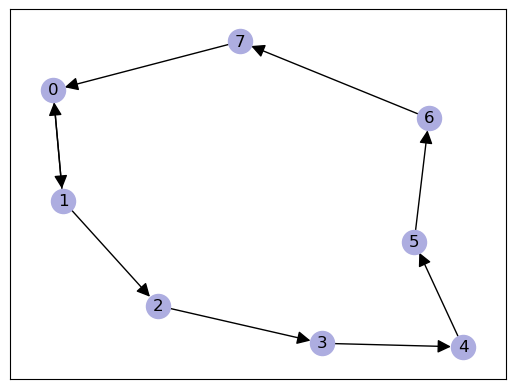

In [ ]:
dataset = HalfCycleGraph(num_nodes=8, center=0)
data = dataset[0]
visualize_graph(data)

# Showcase

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_88073/2928479379.py:88: UserWarning: Data has no ground-truth labels
  warnings.warn("Data has no ground-truth labels")


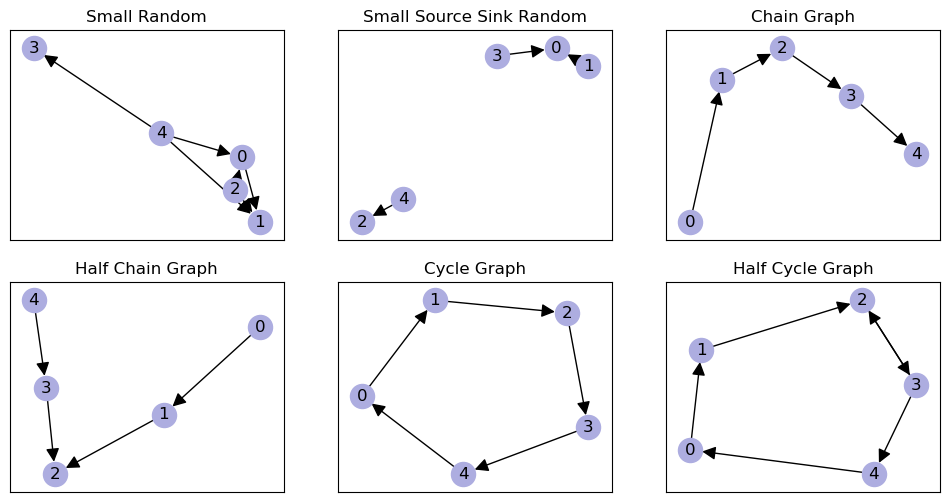

In [ ]:
#| echo: false
dataset = [
    ("Small Random"                     , SmallRandom(num_nodes=5, prob_edge=0.3)[0]),
    ("Small Source Sink Random"         , SmallRandom(num_nodes=5, prob_edge=0.2, 
                                            pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                                        )[0]),
    ("Chain Graph"                      , ChainGraph(num_nodes=5)[0]),
    ("Half Chain Graph"                 , HalfChainGraph(num_nodes=5, center=2)[0]),
    ("Cycle Graph"                      , CycleGraph(num_nodes=5)[0]),
    ("Half Cycle Graph"                 , HalfCycleGraph(num_nodes=5, center=2)[0]),
]
display_graph_gallery(dataset, ncol=3)